- Spatial Data Analysis or ESDA !

In [1]:
import seaborn
import pandas
import geopandas
import pysal
import numpy
import matplotlib.pyplot as plt

In [2]:
mx = geopandas.read_file("/Users/saramaras/Documents/github/machine_learning_gis/geo_data/mexico/mexicojoin.shp")


In [3]:
mx[["NAME", "PCGDP1940"]]

,NAME,PCGDP1940
0,Baja California Norte,22361.0
1,Baja California Sur,9573.0
2,Nayarit,4836.0
3,Jalisco,5309.0
4,Aguascalientes,10384.0
5,Guanajuato,4359.0
6,Queretaro de Arteaga,11016.0
7,Hidalgo,4414.0
8,Michoacan de Ocampo,3327.0
9,Mexico,3408.0


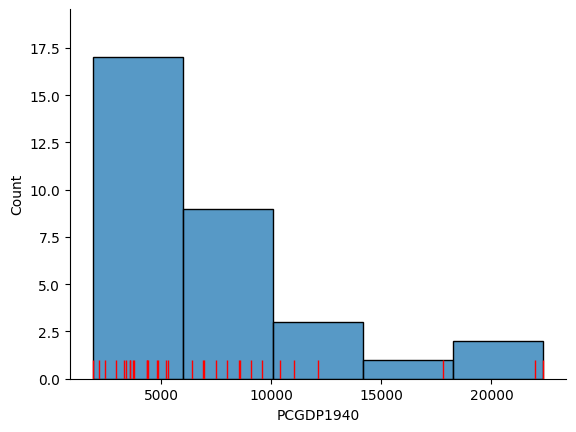

In [4]:
ax=seaborn.histplot(mx["PCGDP1940"], bins=5)
seaborn.rugplot(mx["PCGDP1940"], height=0.05, color="red", ax=ax);
seaborn.despine()

In [5]:
mx["PCGDP1940"].describe()

count       32.000000
mean      7230.531250
std       5204.952883
min       1892.000000
25%       3701.750000
50%       5256.000000
75%       8701.750000
max      22361.000000
Name: PCGDP1940, dtype: float64

In [6]:
counts, bins, patches = ax.hist(mx["PCGDP1940"], bins=5)

In [7]:
counts
#The counts object captures how many observations each category in the classification has:

array([17.,  9.,  3.,  1.,  2.])

In [8]:
bins
#The bin object stores these break points we are interested in when considering classification schemes 

array([ 1892. ,  5985.8, 10079.6, 14173.4, 18267.2, 22361. ])

In [9]:
import mapclassify

In [10]:
ei5 = mapclassify.EqualInterval(mx["PCGDP1940"], k=5)
ei5

EqualInterval               

      Interval         Count
----------------------------
[ 1892.00,  5985.80] |    17
( 5985.80, 10079.60] |     9
(10079.60, 14173.40] |     3
(14173.40, 18267.20] |     1
(18267.20, 22361.00] |     2

In [11]:
q5 = mapclassify.Quantiles(mx.PCGDP1940, k=5)
q5

Quantiles                   

      Interval         Count
----------------------------
[ 1892.00,  3576.20] |     7
( 3576.20,  4582.80] |     6
( 4582.80,  6925.20] |     6
( 6925.20,  9473.00] |     6
( 9473.00, 22361.00] |     7

In [12]:
q5.bins[1:] - q5.bins[:-1]

array([ 1006.6,  2342.4,  2547.8, 12888. ])

- avoids the pitfall of sparse classes

In [13]:
#Set seed for reproducibility

numpy.random.seed(12345)

#Generate a variable of 20 values randomly
#selected from 0 to 10

x = numpy.random.randint(0, 10, 20)

#Manually ensure the first 10 values are 0

x[0:10] = x.min()
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 7, 6, 0, 2, 9, 1, 2, 6, 7])

In [14]:
# run quantile classification

In [15]:
ties = mapclassify.Quantiles(x, k=5)
ties


#sample does not contain enough values to form the number of well-defined classes requested

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Quantiles           

  Interval     Count
--------------------
[0.00, 0.00] |    11
(0.00, 1.40] |     1
(1.40, 6.20] |     4
(6.20, 9.00] |     4

In [16]:
ux = numpy.unique(x)
ux

array([0, 1, 2, 6, 7, 9])

In [17]:
### Third classifier uses sample mean and sample standard deviation

In [18]:
msd = mapclassify.StdMean(mx["PCGDP1940"])
msd

StdMean                     

      Interval         Count
----------------------------
(    -inf, -3179.37] |     0
(-3179.37,  2025.58] |     1
( 2025.58, 12435.48] |    28
(12435.48, 17640.44] |     0
(17640.44, 22361.00] |     3

- This classifier is best used when data is normally distributed or, at least, when the sample mean is a meaningful measure to anchor the classification around

#### Maximum breaks

- The maximum breaks classifier decides where to set the break points between classes by considering the difference between sorted values.

In [19]:
mb5 = mapclassify.MaximumBreaks(mx["PCGDP1940"], k=5)
mb5

MaximumBreaks               

      Interval         Count
----------------------------
[ 1892.00,  5854.00] |    17
( 5854.00, 11574.00] |    11
(11574.00, 14974.00] |     1
(14974.00, 19890.50] |     1
(19890.50, 22361.00] |     2

In [20]:
###appropriate approach when we are interested in making sure observations in each class are separated from those in neighboring classes.

#### Box-plot

In [21]:
bp = mapclassify.BoxPlot(mx["PCGDP1940"])
bp

BoxPlot                     

      Interval         Count
----------------------------
(    -inf, -3798.25] |     0
(-3798.25,  3701.75] |     8
( 3701.75,  5256.00] |     8
( 5256.00,  8701.75] |     8
( 8701.75, 16201.75] |     5
(16201.75, 22361.00] |     3

In [22]:
bp1 = mapclassify.BoxPlot(mx["PCGDP1940"], hinge=1)
bp1

BoxPlot                     

      Interval         Count
----------------------------
(    -inf, -1298.25] |     0
(-1298.25,  3701.75] |     8
( 3701.75,  5256.00] |     8
( 5256.00,  8701.75] |     8
( 8701.75, 13701.75] |     5
(13701.75, 22361.00] |     3

#### Head-Tail Breaks

- Based on a recursive partitioning of the data using splits around iterative means. The splitting process continues until the distributions within each of the classes no longer display a heavy-tailed distribution in the sense that there is a balance between the number of smaller and larger values assigned to each class.

In [23]:
ht = mapclassify.HeadTailBreaks(mx["PCGDP1940"])
ht

HeadTailBreaks              

      Interval         Count
----------------------------
[ 1892.00,  7230.53] |    20
( 7230.53, 12244.42] |     9
(12244.42, 20714.00] |     1
(20714.00, 22163.00] |     1
(22163.00, 22361.00] |     1

#### Jenks Caspall

-  This algorithm aims to minimize the sum of absolute deviations around class means.
- one-dimension case of the widely used K-Means algorithm for clustering

In [24]:

jc5 = mapclassify.JenksCaspall(mx["PCGDP1940"], k=5)
jc5

JenksCaspall                

      Interval         Count
----------------------------
[ 1892.00,  2934.00] |     4
( 2934.00,  4414.00] |     9
( 4414.00,  6399.00] |     5
( 6399.00, 12132.00] |    11
(12132.00, 22361.00] |     3

#### Fisher Jenks

-  approach to minimize the sum of the absolute deviations around class medians

In [25]:

fj5 = mapclassify.FisherJenks(mx["PCGDP1940"], k=5)
fj5

FisherJenks                 

      Interval         Count
----------------------------
[ 1892.00,  5309.00] |    17
( 5309.00,  9073.00] |     8
( 9073.00, 12132.00] |     4
(12132.00, 17816.00] |     1
(17816.00, 22361.00] |     2

#### Max-p

In [26]:
#### find more info


mp5 = mapclassify.MaxP(mx["PCGDP1940"], k=5)
mp5

MaxP                        

      Interval         Count
----------------------------
[ 1892.00,  3569.00] |     7
( 3569.00,  5309.00] |    10
( 5309.00,  7990.00] |     5
( 7990.00, 10384.00] |     5
(10384.00, 22361.00] |     5

### Comparison of the Classification schemes

In [27]:
# Problem: definition of the number of classes and the class boundaries
#Freedman-Diaconis rule was said to be optimal

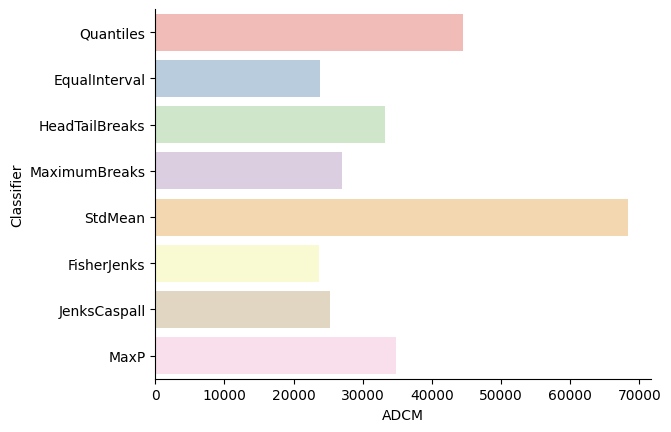

In [31]:
# Bunch of classifier objects

class5 = q5, ei5, ht, mb5, msd, fj5, jc5, mp5

# Collect ADCM for each classifier
fits = numpy.array([c.adcm for c in class5])

# Convert ADCM scores to a DataFrame
adcms = pandas.DataFrame(fits)

# Add classifier names
adcms["classifier"] = [c.name for c in class5]

# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = seaborn.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

seaborn.despine()

In [32]:
# Append class values as a separate column
mx["Quantiles"] = q5.yb
mx["Equal Interval"] = ei5.yb
mx["Head-Tail Breaks"] = ht.yb
mx["Maximum Breaks"] = mb5.yb
mx["Mean-Standard Deviation"] = msd.yb
mx["Fisher-Jenks"] = fj5.yb
mx["Jenks Caspall"] = jc5.yb
mx["MaxP"] = mp5.yb

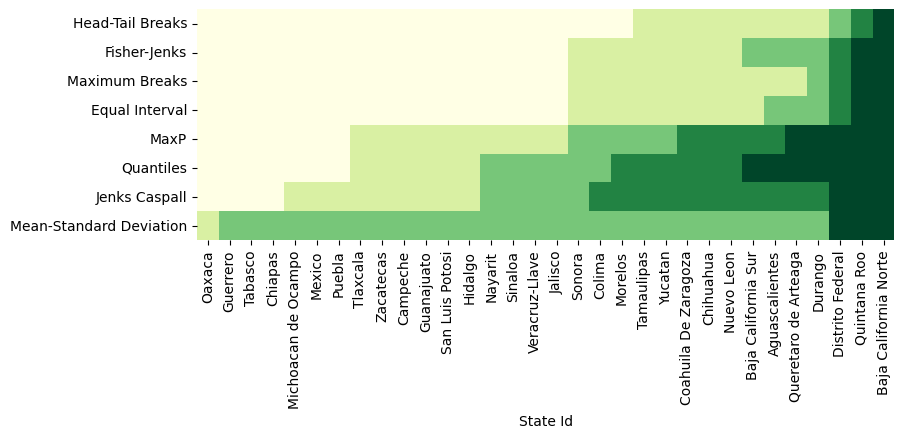

In [42]:
f, ax = plt.subplots(1, figsize=(9,3))

seaborn.heatmap(
    mx.set_index("NAME").sort_values("PCGDP1940")[
        ["Head-Tail Breaks",
        "Fisher-Jenks",
        "Maximum Breaks",
        "Equal Interval",
        "MaxP",
        "Quantiles",
        "Jenks Caspall",
         "Mean-Standard Deviation"
        
        ]
    ].T,
    cmap="YlGn",
    cbar=False,
    ax=ax

)
ax.set_xlabel("State Id");

In [43]:
df = pandas.DataFrame(
    {c.name: c.counts for c in class5},
    index = ["Class-{}".format(i) for i in range(5)]
)

In [44]:
df

,Quantiles,EqualInterval,HeadTailBreaks,MaximumBreaks,StdMean,FisherJenks,JenksCaspall,MaxP
Class-0,7,17,20,17,0,17,4,7
Class-1,6,9,9,11,1,8,9,10
Class-2,6,3,1,1,28,4,5,5
Class-3,6,1,1,1,0,1,11,5
Class-4,7,2,1,2,3,2,3,5


## Color

In [45]:
mx.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,TEST,geometry,Quantiles,Equal Interval,Head-Tail Breaks,Maximum Breaks,Mean-Standard Deviation,Fisher-Jenks,Jenks Caspall,MaxP
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405...",4,4,4,4,4,4,4,4
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302...",4,1,1,1,2,2,3,3
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475...",2,0,0,0,2,0,2,1
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7...",2,0,0,0,2,0,2,1
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8...",4,2,1,1,2,2,3,3


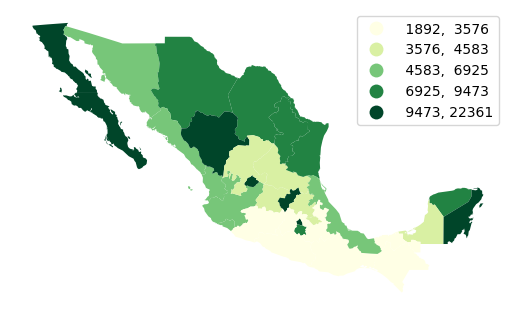

In [48]:
ax = mx.plot(column = "PCGDP1940",#data to plot
             scheme= "Quantiles", #classification scheme
             cmap= "YlGn", 
             legend=True,
             legend_kwds={"fmt": "{:.0f}"} #remove decimals in the legend
            )

ax.set_axis_off();   #remove axis

#### Sequential Palettes

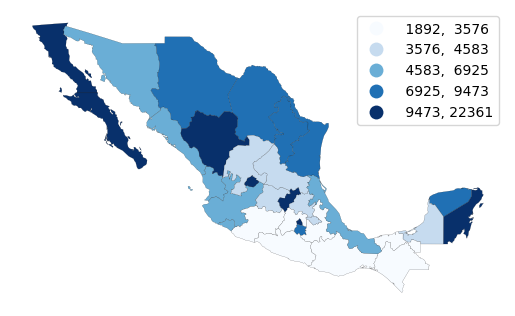

In [52]:
ax = mx.plot(
    column="PCGDP1940",  # Data to plot
    scheme="Quantiles",  # Classification scheme
    cmap="Blues",  # Color palette
  
    linewidth=0.1,# Borderline width
    edgecolor="k",     # Borderline color
    legend=True,  # Add legend
    legend_kwds={
        "fmt": "{:.0f}"
    },  # Remove decimals in legend (for legibility)
)
ax.set_axis_off();

#### Diverging Palettes

In [57]:
mx.shape

(32, 43)

In [53]:
# Create income-based rank table (Rank1 is the highest)

rnk = mx[["NAME", "PCGDP1940", "PCGDP2000"]].rank(ascending=False)

#Compute change from 1940 to 2000

rnk['change'] = rnk['PCGDP1940'] - rnk['PCGDP2000']

# add column with the bin class

rnk['class'] = pandas.cut(rnk['change'], [-numpy.inf, -5, 0, 5, 20])

In [54]:
rnk.head()

,NAME,PCGDP1940,PCGDP2000,change,class
0,31.0,1.0,6.0,-5.0,"(-inf, -5.0]"
1,30.0,7.0,10.0,-3.0,"(-5.0, 0.0]"
2,15.0,19.0,29.0,-10.0,"(-inf, -5.0]"
3,19.0,16.0,13.0,3.0,"(0.0, 5.0]"
4,32.0,6.0,8.0,-2.0,"(-5.0, 0.0]"


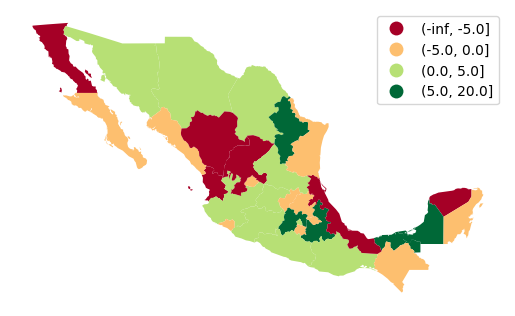

In [61]:
ax = (mx[["geometry"]].join(rnk).plot("class", legend=True, cmap="RdYlGn"))
ax.set_axis_off()

In [ ]:
#the red (green) hues are states that have moved downwards (upwards) in the income distribution, with the darker hue representing a larger movement.

#### Qualitative Palettes

- encode categorical data, colors do not follow gradient

In [62]:
mx["HANSON98"].head()

0    1.0
1    2.0
2    2.0
3    3.0
4    2.0
Name: HANSON98, dtype: float64

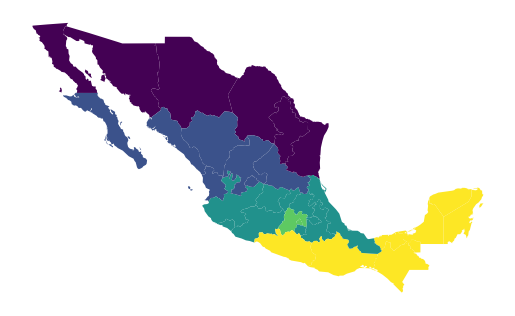

In [66]:
ax = mx.plot("HANSON98")
ax.set_axis_off();   #5 regions of Mexico
                    

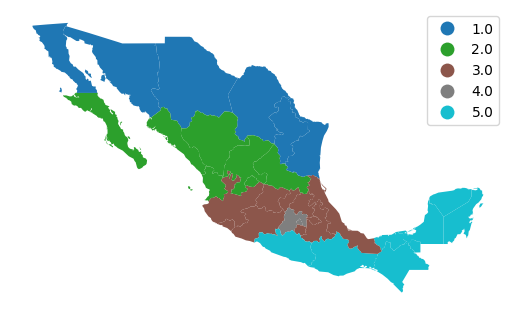

In [64]:
ax = mx.plot("HANSON98", categorical=True, legend=True) #more appropiate

ax.set_axis_off();

## Advanced topics

### User-defined choropleths

In [67]:
classi = mapclassify.UserDefined(
    mx["PCGDP2000"], [10000, 12500, 15000]
)
classi

UserDefined                 

      Interval         Count
----------------------------
[ 8684.00, 10000.00] |     2
(10000.00, 12500.00] |     7
(12500.00, 15000.00] |     1
(15000.00, 54349.00] |    22

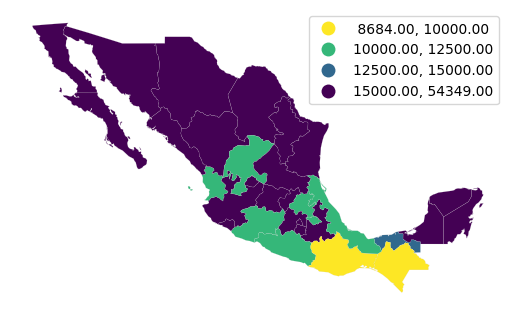

In [68]:
classi.plot(
    mx,  # Use geometries in the geo-table
    legend=True,  # Add a legend
    legend_kwds={
        "loc": "upper right"
    },  # Place legend on top right corner
    axis_on=False,  # Remove axis
    cmap="viridis_r",  # Use reverse Viridis
);

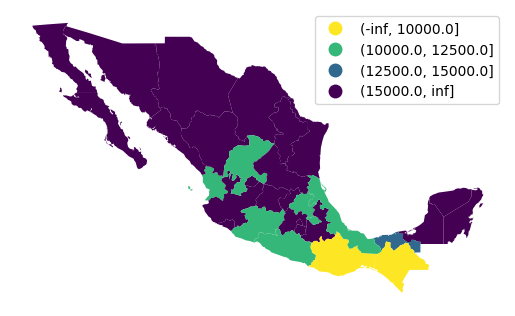

In [69]:
# Classify values specifying bins
lbls = pandas.cut(
    mx["PCGDP2000"], [-numpy.inf, 10000, 12500, 15000, numpy.inf]
)
# Dynamically assign to geo-table and plot with a legend
ax = mx.plot(lbls, cmap="viridis_r", legend=True)
# Remove axis
ax.set_axis_off();

### Pooled Classifications

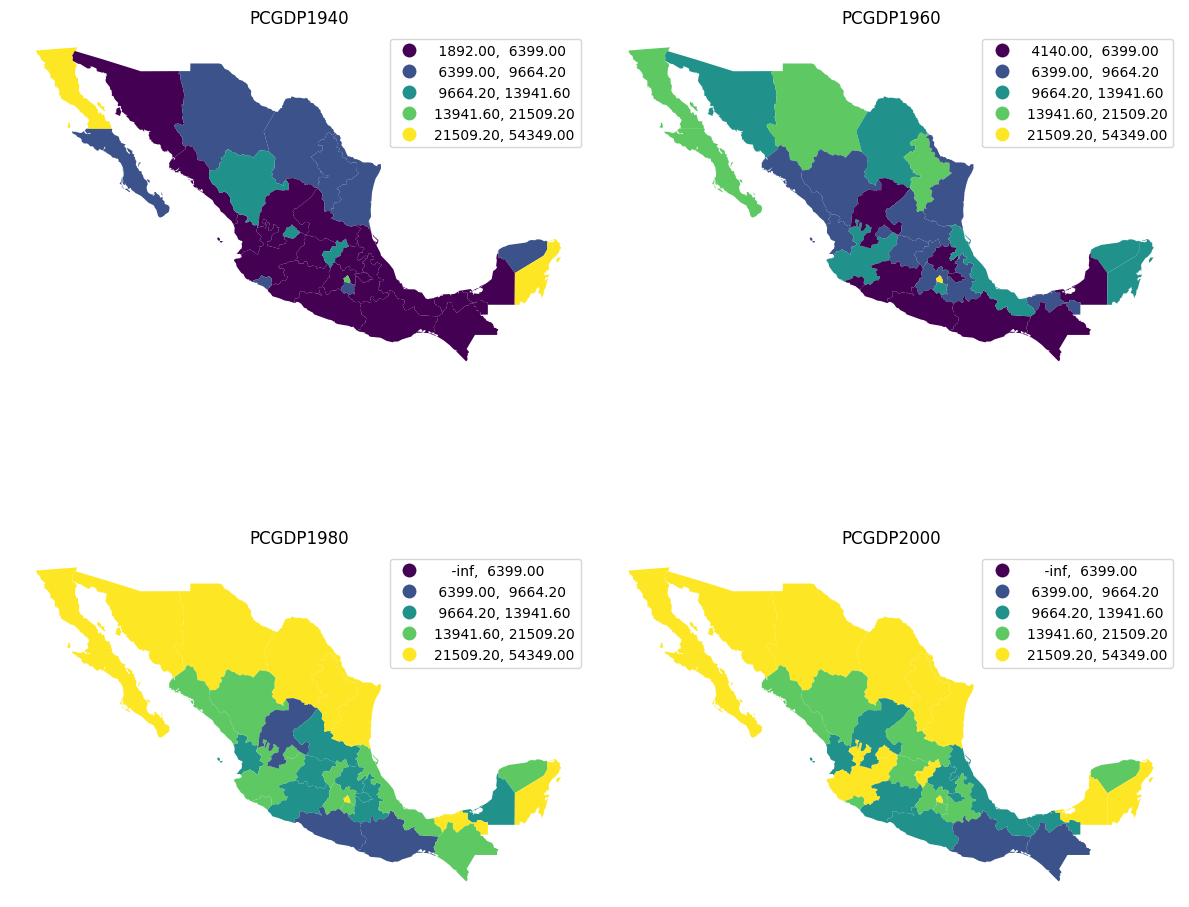

In [76]:
# List the years we want of pc GDP
years = ["PCGDP1940", "PCGDP1960", "PCGDP1980", "PCGDP2000"]
# Create pooled classification
pooled = mapclassify.Pooled(mx[years], classifier="Quantiles", k=5)






# Set up figure with 4 axis
f, axs = plt.subplots(2,2, figsize=(12,12))
#Flatten the array of axis so you can loop over

axs = axs.flatten()

#Loop over each year

for i, y in enumerate(years):
    mx.plot(
    y, #year to plot
    scheme="UserDefined",
    classification_kwds={
        "bins": pooled.global_classifier.bins
    }, #Use global bins
    legend=True,
    ax=axs[i]#plot on the corresponding axis
    )
    axs[i].set_axis_off()
    axs[i].set_title(y)
#tight layout to better use space
plt.tight_layout()